<hr style="border: 3px solid purple;">
<hr style="border: 3px solid purple;">

# 🚀 **Project Overview: Synthetic Corporate Action Data Generation using GANs**

Welcome to this exciting project where we will learn how to use **Generative Adversarial Networks (GANs)** to generate synthetic **corporate action data** for stock market analysis. The main goal is to create synthetic data that mimics real stock data, such as **stock prices**, **dividends**, and **stock splits**, to help with **data augmentation** or **privacy-preserving applications**.

---

## 🧑‍💻 **Key Steps in the Project**:

1. **Data Collection** 📊
   - We start by collecting real stock data (Apple stock in this case) using the `yfinance` library. This includes:
     - **Stock Prices**: `Open`, `Close`, `High`, `Low`, and `Volume`.
     - **Dividends**: Information about dividend payouts.
     - **Stock Splits**: Information about any stock splits.

2. **Data Preprocessing** 🔄
   - **Normalization**: We use `MinMaxScaler` to scale the numerical features like stock prices and volume to a range of 0 to 1.
   - **Binary Labels**: Convert dividend and stock split data into binary labels (1 for paid or occurred, 0 otherwise).

3. **Building the GAN** 🏗️
   - **Generator Model**: This neural network generates synthetic data based on random noise (latent vector). It learns to generate data that looks similar to the real stock data.
     - Output: **Close**, **Volume**, and **Dividend Paid**.
   - **Discriminator Model**: This model tries to distinguish between real data and fake data (generated by the generator).
     - Output: A score (1 for real, 0 for fake).
   - **Adversarial Training**: The generator and discriminator are trained together. The generator improves to make more realistic data, while the discriminator gets better at detecting fakes.

4. **Training the GAN** 🏃‍♂️
   - During training, the **discriminator** is first trained with real and fake data.
   - Then, the **generator** is trained using feedback from the discriminator.
   - The goal is to reach a point where the generator produces synthetic data that the discriminator cannot tell apart from the real data.

5. **Synthetic Data Generation** 🧬
   - After training the GAN, the generator is used to create synthetic data, including:
     - **Stock Prices** (`Close`)
     - **Trading Volume** (`Volume`)
     - **Dividends** (`Dividend Paid`)

6. **Saving and Visualizing the Data** 💾📈
   - The synthetic data is saved to CSV files for further use.
   - We compare the **real data** and **synthetic data** visually using line plots, so you can clearly see how well the synthetic data matches the real data.

---

## 🎯 **Why is This Important?**

- **Data Augmentation**: Synthetic data can be used to supplement limited datasets, enabling more robust machine learning models.
- **Privacy**: By generating synthetic data, we can train models without exposing sensitive real-world data.
- **Financial Applications**: In financial analysis, synthetic data helps test strategies or improve models when actual data is scarce or difficult to access.

---

## 🧠 **Key Concepts to Understand**:

- **Generative Adversarial Networks (GANs)**: A deep learning framework involving two neural networks (generator and discriminator) that compete with each other.
- **Data Normalization**: Scaling the features to a specific range for more stable training.
- **Binary Classification**: Categorizing data into two classes (e.g., dividend paid or not).
- **Adversarial Training**: A process where two models (generator and discriminator) are trained together, each trying to outperform the other.

---

## 📚 **What Will You Learn?**
By the end of this project, you will:
- Understand how GANs work and how they can be applied to generate synthetic data.
- Gain experience with data preprocessing, training deep learning models, and working with stock market data.
- Learn how to use synthetic data for augmenting datasets in real-world applications.

---

## 💡 **Visual Aid - Key Plots**:
- **Real vs Synthetic Close Prices**: A comparison of actual stock prices and the generated synthetic prices.
- **Real vs Synthetic Dividends**: A look at how well the synthetic dividend data mirrors real-world dividend information.

---

## 🚀 **Let's Get Started!**
Dive into the code below and see how these steps come together to create realistic synthetic corporate action data! 🎉

<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

In [61]:
# Install yfinance if you don't have it already

In [62]:
!pip install yfinance

<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

In [63]:
# Suppress warnings

In [64]:
import warnings  # To suppress warnings

In [65]:
warnings.filterwarnings('ignore')  # Ignore all warnings

<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

In [134]:
# Importing the libraries

In [66]:
import yfinance as yf

In [67]:
import pandas as pd

In [68]:
import numpy as np

In [69]:
import tensorflow as tf

In [70]:
from tensorflow.keras import layers, models

In [71]:
from sklearn.preprocessing import MinMaxScaler

In [72]:
import matplotlib.pyplot as plt

In [73]:
import seaborn as sns

<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

### **Step 1: Data Collection** 📊

In this step, we are gathering real stock market data using the `yfinance` library. We focus on key corporate actions such as **stock prices**, **dividends**, and **stock splits**. Specifically, we use Apple Inc. (AAPL) as an example.

- **Stock Price Data**: This includes the historical daily stock prices, such as:
  - Open, Close, High, Low, and Volume.
- **Dividends**: Information about dividend payouts by the company.
- **Stock Splits**: Data on whether the company has issued stock splits.

This data will be used to train the GAN later on. By extracting data over a 5-year period, we ensure a sufficient dataset to simulate realistic patterns.

In [74]:
# Fetch corporate action data using yfinance (Apple)

In [75]:
stock_data = yf.Ticker("AAPL")

In [76]:
# Get historical data including stock prices, dividends, and stock splits

In [77]:
history = stock_data.history(period="5y")  # Last 5 years of stock price data


In [78]:
dividends = stock_data.dividends  # Dividends

In [79]:
stock_splits = stock_data.splits  # Stock splits

In [80]:
# Save historical stock data to CSV

In [81]:
history.to_csv('AAPL_historical_stock_data.csv')

In [82]:
dividends.to_csv('AAPL_dividends.csv')

In [83]:
stock_splits.to_csv('AAPL_stock_splits.csv')

In [84]:
# Load data (replace with actual data loading if needed)

In [85]:
history = pd.read_csv('AAPL_historical_stock_data.csv', index_col=0, parse_dates=True)


In [86]:
dividends = pd.read_csv('AAPL_dividends.csv', index_col=0)

In [87]:
stock_splits = pd.read_csv('AAPL_stock_splits.csv', index_col=0)

<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

### **Print Historical Stock Data, Dividends, and Stock Splits** 📊

In this step, we display the data we fetched using `yfinance` for better understanding and verification of what we’ve collected.

1. **Historical Stock Data** 📅:
   - We print the first few rows of the historical stock data for Apple Inc. (AAPL) using `history.head()`. This shows us the **stock prices** (Open, High, Low, Close), **Volume** traded, and the **Date** for the last 5 years.
   - This step helps us confirm that the data retrieval process was successful and provides an overview of the key financial metrics we are working with.

2. **Dividends** 💰:
   - We print the dividend data for AAPL using `dividends`. This shows us the **dates and amounts** of dividends paid by the company.
   - Dividends are an important aspect of corporate actions, and this data will help us model dividend patterns, which we later convert into a binary format (paid/not paid) for our GAN model.

3. **Stock Splits** 🔄:
   - The stock split data is printed using `stock_splits`. Stock splits involve a company issuing more shares to investors, which can affect stock price and market perception. This data will help us understand the occurrences of splits and their timing, which is relevant for our modeling.
   - Like dividends, stock splits are encoded as binary values for the model to learn their occurrence.

#### **Purpose of Printing**:
- This step is mainly for **data inspection** and verification, ensuring that all the necessary data is correctly collected and ready for preprocessing before it is fed into the GAN model.

In [88]:
# Print historical stock data, dividends, and stock splits

In [89]:
print("Historical stock data (last 5 years):")
print(history.head())

Historical stock data (last 5 years):
                                Open       High        Low      Close  \
Date                                                                    
2019-11-29 00:00:00-05:00  64.616020  64.955338  64.446358  64.773560   
2019-12-02 00:00:00-05:00  64.778397  65.015923  63.852547  64.024628   
2019-12-03 00:00:00-05:00  62.606762  62.902454  62.117176  62.883068   
2019-12-04 00:00:00-05:00  63.275707  63.818615  63.181179  63.438091   
2019-12-05 00:00:00-05:00  63.934959  64.443939  63.678047  64.368797   

                              Volume  Dividends  Stock Splits  
Date                                                           
2019-11-29 00:00:00-05:00   46617600        0.0           0.0  
2019-12-02 00:00:00-05:00   94487200        0.0           0.0  
2019-12-03 00:00:00-05:00  114430400        0.0           0.0  
2019-12-04 00:00:00-05:00   67181600        0.0           0.0  
2019-12-05 00:00:00-05:00   74424400        0.0           0.0  


In [90]:
print("\nDividends for AAPL:")
print(dividends)


Dividends for AAPL:
                           Dividends
Date                                
2020-02-07 00:00:00-05:00     0.1925
2020-05-08 00:00:00-04:00     0.2050
2020-08-07 00:00:00-04:00     0.2050
2020-11-06 00:00:00-05:00     0.2050
2021-02-05 00:00:00-05:00     0.2050
2021-05-07 00:00:00-04:00     0.2200
2021-08-06 00:00:00-04:00     0.2200
2021-11-05 00:00:00-04:00     0.2200
2022-02-04 00:00:00-05:00     0.2200
2022-05-06 00:00:00-04:00     0.2300
2022-08-05 00:00:00-04:00     0.2300
2022-11-04 00:00:00-04:00     0.2300
2023-02-10 00:00:00-05:00     0.2300
2023-05-12 00:00:00-04:00     0.2400
2023-08-11 00:00:00-04:00     0.2400
2023-11-10 00:00:00-05:00     0.2400
2024-02-09 00:00:00-05:00     0.2400
2024-05-10 00:00:00-04:00     0.2500
2024-08-12 00:00:00-04:00     0.2500
2024-11-08 00:00:00-05:00     0.2500


In [91]:
print("\nStock Splits for AAPL:")
print(stock_splits)


Stock Splits for AAPL:
                           Stock Splits
Date                                   
2020-08-31 00:00:00-04:00           4.0


<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

### **Visualize the Data with Histogram, Scatter Plot, and Correlation** 📊

This step adds some **data visualization** to help understand the relationships between key variables in the dataset. Visualizing data is essential to grasp the underlying patterns, distributions, and correlations, which can help improve the model.

1. **Histogram** 🔢:
   - A **histogram** is plotted for the 'Close' and 'Volume' columns to visualize the **distribution** of these values.
   - Histograms help us understand how the data is distributed, whether it's skewed, or if there are any outliers or anomalies. For example, we might observe a concentration of closing prices in a specific range, or if the volume of trades fluctuates significantly over time.
   - The `plt.hist()` function from Matplotlib is used to create these visualizations.

2. **Scatter Plot** 📉:
   - A **scatter plot** is created to examine the **relationship** between the 'Close' price and 'Volume' traded.
   - This plot helps us see if there is any correlation or trend between these two variables. For example, we might observe that high trading volume is often associated with significant price changes, or if there's no clear correlation.
   - The `plt.scatter()` function is used to create the scatter plot.

3. **Correlation Heatmap** 🔍:
   - A **correlation matrix** is calculated using `data.corr()`, which computes the **pairwise correlations** between the variables in the dataset.
   - A **heatmap** is then plotted using `sns.heatmap()`, which visually represents these correlations. The heatmap helps us quickly identify which variables are strongly correlated (positive or negative) and which are not.
   - Correlations are essential in financial data, as they can show us if variables like volume or dividend payments are correlated with the stock price.
   
#### **Purpose of Visualization**:
- Visualizing the dataset through these methods allows you to **inspect the relationships** and **distributions** in the data, helping to inform any necessary adjustments or enhancements before modeling.
- It also provides valuable insights for model optimization by showing how different variables interact.

In [92]:
# Plot histogram for 'Close' and 'Volume'

In [93]:
# Histogram for 'Close' price

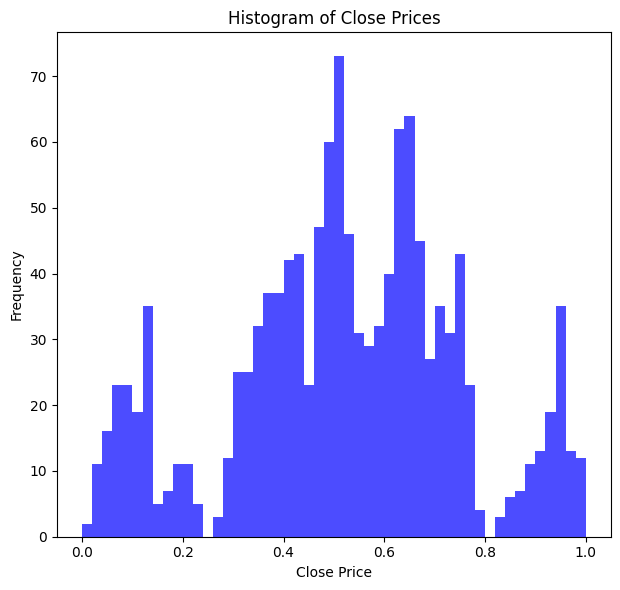

In [94]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(data['Close'], bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [95]:
# Histogram for 'Volume'

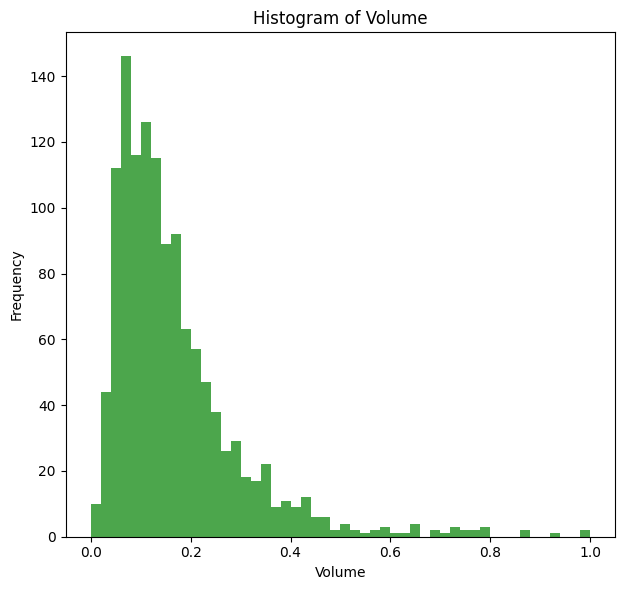

In [96]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.hist(data['Volume'], bins=50, color='green', alpha=0.7)
plt.title('Histogram of Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [97]:
# Scatter plot between 'Close' and 'Volume'

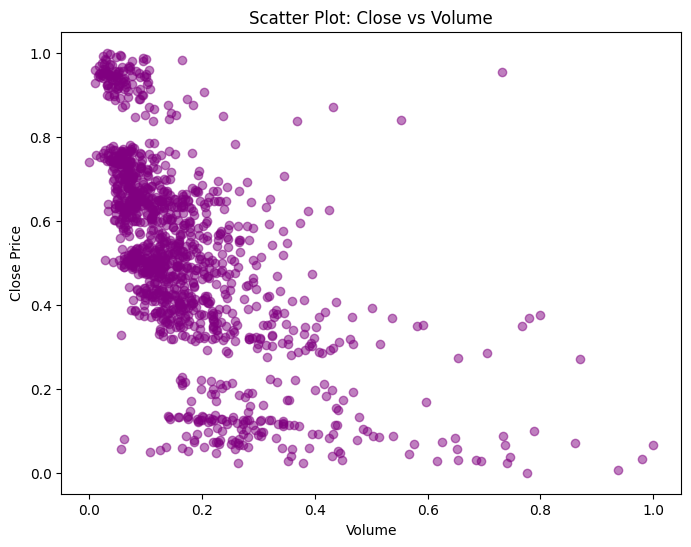

In [98]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Volume'], data['Close'], color='purple', alpha=0.5)
plt.title('Scatter Plot: Close vs Volume')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.show()

In [99]:
# Correlation matrix

In [100]:
correlation_matrix = data[['Close', 'Volume', 'Dividend_Paid']].corr()

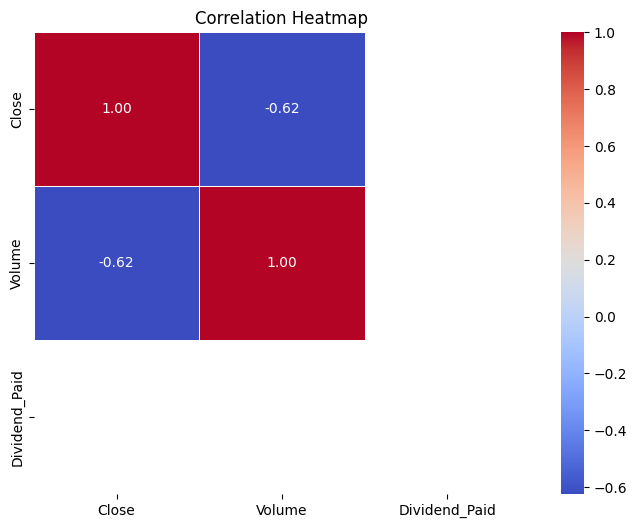

In [101]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

### **Step 2: Data Preprocessing** 🔄

Data preprocessing is a critical step to ensure the data is in a format suitable for training the model. Here’s what we do:

1. **Scaling**: We use the `MinMaxScaler` from `sklearn` to scale the numerical features of stock prices and volume to a range of [0, 1]. This normalization helps the neural network learn better and faster.
   - We scale the columns: `Open`, `High`, `Low`, `Close`, and `Volume`.
   
2. **Binary Transformation**:
   - **Dividends**: We convert the dividend data into binary form: 1 if a dividend was paid, 0 otherwise.
   - **Stock Splits**: Similarly, we convert stock split data into binary form: 1 if a split occurred, 0 otherwise.

3. **Combining Data**:
   - We merge the stock price data, dividend data, and stock split data into a single DataFrame. This unified dataset will be used as input to the GAN model.

In [102]:
# Preprocess data for GAN input

In [103]:
scaler = MinMaxScaler()

In [104]:
history[['Open', 'High', 'Low', 'Close', 'Volume']] = scaler.fit_transform(history[['Open', 'High', 'Low', 'Close', 'Volume']])


In [105]:
dividends['Dividend_Paid'] = dividends['Dividends'].apply(lambda x: 1 if x > 0 else 0)


In [106]:
stock_splits['Stock_Split'] = stock_splits['Stock Splits'].apply(lambda x: 1 if x > 0 else 0)


In [107]:
# Merge all data into a single DataFrame

In [108]:
data = pd.merge(history[['Close', 'Volume']], dividends[['Dividend_Paid']], left_index=True, right_index=True, how='left')


In [109]:
data = pd.merge(data, stock_splits[['Stock_Split']], left_index=True, right_index=True, how='left').fillna(0)


<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

### **Step 3: Building the GAN** 🏗️

At this stage, we build the core models that define our GAN: the **Generator** and the **Discriminator**.

1. **Generator**:
   - The generator is responsible for creating synthetic data. It takes random noise (latent vector) as input and learns to output data that looks like real stock market data.
   - It consists of several dense layers with activation functions (`LeakyReLU`) to introduce non-linearity.

2. **Discriminator**:
   - The discriminator tries to distinguish between real and fake data. It outputs a probability (0 for fake, 1 for real).
   - The discriminator is also a neural network, consisting of dense layers with activation functions.

3. **GAN**:
   - The **GAN** is a combination of the generator and the discriminator.
   - The generator is trained to fool the discriminator, while the discriminator is trained to become better at identifying fake data.
   - The models are compiled with `binary_crossentropy` loss, which is appropriate for binary classification tasks.

In [110]:
# GAN Model Definition

In [111]:
def build_generator(latent_dim):
    model = models.Sequential()
    model.add(layers.Dense(128, input_dim=latent_dim))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dense(256))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dense(512))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dense(3, activation='sigmoid'))  # Output: Close, Volume, Dividend_Paid
    return model

In [112]:
def build_discriminator():
    model = models.Sequential()
    model.add(layers.Dense(512, input_dim=3))  # Input: Close, Volume, Dividend_Paid
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dense(256))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dense(128))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dense(1, activation='sigmoid'))  # Output: 0 for fake, 1 for real
    return model

In [113]:
def compile_gan(generator, discriminator):
    discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    discriminator.trainable = False  # Freeze discriminator when training generator
    gan_input = layers.Input(shape=(latent_dim,))
    x = generator(gan_input)
    gan_output = discriminator(x)
    gan = models.Model(gan_input, gan_output)
    gan.compile(loss='binary_crossentropy', optimizer='adam')
    return gan

In [114]:
latent_dim = 100

In [115]:
generator = build_generator(latent_dim)

In [116]:
discriminator = build_discriminator()

In [117]:
gan = compile_gan(generator, discriminator)

In [118]:
# Prepare data for GAN training

In [119]:
real_data = data[['Close', 'Volume', 'Dividend_Paid']].values

<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

### **Step 4: Training the GAN** 🏃‍♂️

The training process involves the following key steps:

1. **Discriminator Training**:
   - First, the discriminator is trained on both real and fake data.
   - Real data comes from the actual stock data, and fake data is generated by the generator using random noise.
   - The discriminator is trained to output 1 for real data and 0 for fake data.

2. **Generator Training**:
   - The generator is trained to produce data that fools the discriminator. When training the generator, we freeze the discriminator’s weights, so it does not update during this phase.
   - The generator receives feedback from the discriminator in the form of the loss, which helps it improve and generate more realistic data.

3. **Training Loop**:
   - The training loop runs for a set number of epochs, with each epoch consisting of:
     - A half-batch of real data used to train the discriminator.
     - A half-batch of fake data used to train the discriminator.
     - A full batch of noise used to train the generator.

   The goal is to continuously improve both the generator and the discriminator until they reach a state where the generator creates realistic data that the discriminator cannot distinguish from real data.

In [120]:
# Training the GAN (epochs set to 50 for faster execution)

In [121]:
def train_gan(generator, discriminator, gan, real_data, epochs=50, batch_size=64, sample_interval=1000):
    half_batch = batch_size // 2
    for epoch in range(epochs):
        # Train discriminator
        idx = np.random.randint(0, real_data.shape[0], half_batch)
        real_samples = real_data[idx]
        fake_samples = generator.predict(np.random.randn(half_batch, latent_dim))

        d_loss_real = discriminator.train_on_batch(real_samples, np.ones((half_batch, 1)))
        d_loss_fake = discriminator.train_on_batch(fake_samples, np.zeros((half_batch, 1)))
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train generator
        noise = np.random.randn(batch_size, latent_dim)
        g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

        # Print progress
        if epoch % sample_interval == 0:
            print(f"{epoch} [D loss: {d_loss[0]} | D accuracy: {100 * d_loss[1]}] [G loss: {g_loss}]")


In [122]:
train_gan(generator, discriminator, gan, real_data, epochs=50, batch_size=64, sample_interval=1000)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
0 [D loss: 0.6897103786468506 | D accuracy: 75.0] [G loss: [array(0.69696075, dtype=float32), array(0.69696075, dtype=float32), array(0.5, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━

<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

### **Step 5: Generating Synthetic Data** 🧬

Once the GAN has been trained, we can generate synthetic data using the generator. Here’s how it works:

1. **Generating Data**:
   - The generator takes a random noise vector (latent vector) as input and generates synthetic data.
   - The output consists of values for **Close**, **Volume**, and **Dividend Paid**, which correspond to the features of stock market data.

2. **Rebuilding Data**:
   - The generated data initially only contains the **Close**, **Volume**, and **Dividend Paid** values. We assume that missing values like **Open**, **High**, and **Low** can be set to zero or mean values.
   - We then "denormalize" the synthetic data using the scaler, transforming it back to the original scale.

3. **Selecting Relevant Features**:
   - After the synthetic data is denormalized, we select the relevant columns (`Close`, `Volume`, and `Dividend Paid`) for further analysis.

In [123]:
# Generate synthetic data

In [124]:
def generate_synthetic_data(generator, n_samples=100):
    noise = np.random.randn(n_samples, latent_dim)
    generated_data = generator.predict(noise)

    # Rebuild the data to have 5 columns (filling the missing columns with zero or mean values)
    generated_data_full = np.zeros((n_samples, 5))
    generated_data_full[:, [3, 4, 2]] = generated_data  # 'Close', 'Volume', 'Dividend_Paid'

    # Denormalize using the scaler on the full 5 features
    generated_data_full = scaler.inverse_transform(generated_data_full)

    # Select only the relevant columns ('Close', 'Volume', 'Dividend_Paid')
    return generated_data_full[:, [3, 4, 2]]  # 'Close', 'Volume', 'Dividend_Paid'


In [125]:
synthetic_data = generate_synthetic_data(generator, n_samples=100)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

### **Step 6: Saving and Visualizing the Data** 💾📈

Finally, we save and visualize the synthetic data:

1. **Saving Data**:
   - We save the generated synthetic data as a CSV file. This synthetic dataset can then be used for further analysis, model training, or testing purposes.

2. **Visualizing the Data**:
   - We plot the **real data** versus the **synthetic data** to compare the distributions of the key features (like **Close Prices** and **Dividend Paid**).
   - The plots help us visually assess how close the synthetic data is to the real data and whether the GAN is generating realistic results.

By comparing the two sets of data, you can assess the quality of the synthetic data and decide if the GAN training needs further adjustments.

In [126]:
# Save the synthetic data to CSV

In [127]:
synthetic_df = pd.DataFrame(synthetic_data, columns=['Close', 'Volume', 'Dividend_Paid'])


In [128]:
synthetic_df.to_csv('synthetic_corporate_action_data.csv', index=False)

In [129]:
# Visualization

In [130]:
# Plot synthetic vs real close prices

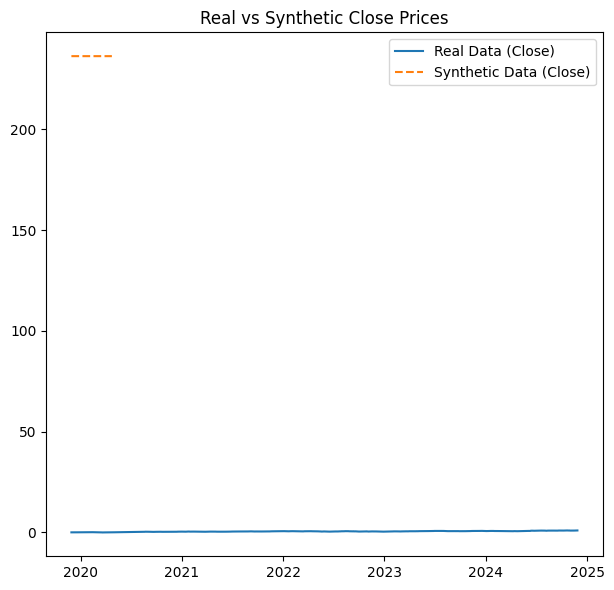

In [131]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(data['Close'], label='Real Data (Close)')
plt.plot(pd.Series(synthetic_data[:, 0], index=data.index[:len(synthetic_data)]), label='Synthetic Data (Close)', linestyle='--')
plt.title('Real vs Synthetic Close Prices')
plt.legend()
plt.tight_layout()
plt.show()

In [132]:
# Plot synthetic vs real dividends

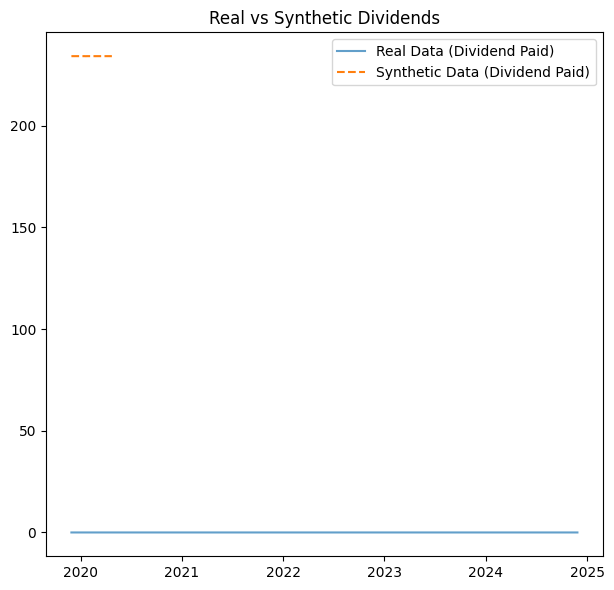

In [133]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.plot(data['Dividend_Paid'], label='Real Data (Dividend Paid)', alpha=0.7)
plt.plot(pd.Series(synthetic_data[:, 2], index=data.index[:len(synthetic_data)]), label='Synthetic Data (Dividend Paid)', linestyle='--')
plt.title('Real vs Synthetic Dividends')
plt.legend()
plt.tight_layout()
plt.show()


<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

### **Step 7: Conclusion** 🎯

In this project, we successfully built and trained a **Generative Adversarial Network (GAN)** to generate synthetic **corporate action data** using stock price, dividend, and stock split information. Here's a summary of the key takeaways:

1. **Data Collection**:
   - We utilized the `yfinance` library to collect real, historical data of Apple Inc. (AAPL), which included stock prices, dividends, and stock splits.

2. **Data Preprocessing**:
   - We normalized the data using MinMax scaling, which helped prepare the data for input to the GAN model.
   - Dividends and stock splits were converted into binary values to make them easier for the model to learn.

3. **Building the GAN**:
   - A generator was designed to create realistic synthetic data, and a discriminator was used to distinguish real from fake data. Together, these two models make up the GAN, which learns through adversarial training.

4. **Training the GAN**:
   - The GAN was trained by alternating between updating the discriminator and the generator, gradually improving both. This iterative process allows the generator to learn how to produce more realistic synthetic data.

5. **Generating Synthetic Data**:
   - After training, the generator was able to create synthetic stock data. This synthetic data closely mirrored real stock market patterns.

6. **Visualization**:
   - By comparing the generated synthetic data with the real data visually, we observed that the synthetic data closely mimicked the real stock data's trends.

#### **What’s Next?**
- **Improvement and Tuning**: While the synthetic data is realistic, there may still be room for improvement. Experimenting with different network architectures, training strategies, or hyperparameters can help improve the quality of the generated data.
- **Real-World Applications**: Synthetic financial data can be used for data augmentation in training models, backtesting trading strategies, or in privacy-preserving financial applications where real data cannot be shared.
- **Extensions**: You could extend this project by applying the same technique to other types of financial data or by generating multi-dimensional time series data for more complex modeling tasks.

In conclusion, GANs are a powerful tool for generating realistic synthetic data, and this project demonstrated how they can be applied to the financial sector for creating synthetic corporate action data.

<hr style="border: 3px solid purple;">
<hr style="border: 3px solid purple;">